# Magics

So far `gAutoy` supports only 2 core magics: `%%gautoy_bash` and `%gautoy_screenshot`. The former allows to run `ksh` codes on the targets, while the latter serves as in-place screenshot taker. Upon request we can introduce more core magics later.

Core magics can be **imported** directly from `gautoy` package

In [1]:
import gautoy
gautoy.core.config.set_option('target.ip', '196.1.1.1')

## Taking screenshots with `%gautoy_screenshot`

Line magic `%gautoy_screenshot` helps to take screenshots easily. Take help on this magic with option `-h`.

In [2]:
%gautoy_screenshot -h

usage: __main__.py [-h] [-l LOGIN] [-p PASSWORD] [-ne] [-c] [-o OUTPUT] [host]

positional arguments:
  host

optional arguments:
  -h, --help            show this help message and exit
  -l LOGIN, --login LOGIN
                        Target login
  -p PASSWORD, --password PASSWORD
                        Target password
  -ne, --no-embed       Embed image to notebook
  -c, --close-traceclient
                        Close TraceClient after callback that takes screenshot
  -o OUTPUT, --output OUTPUT
                        Output folder


To take a screenshot simply write

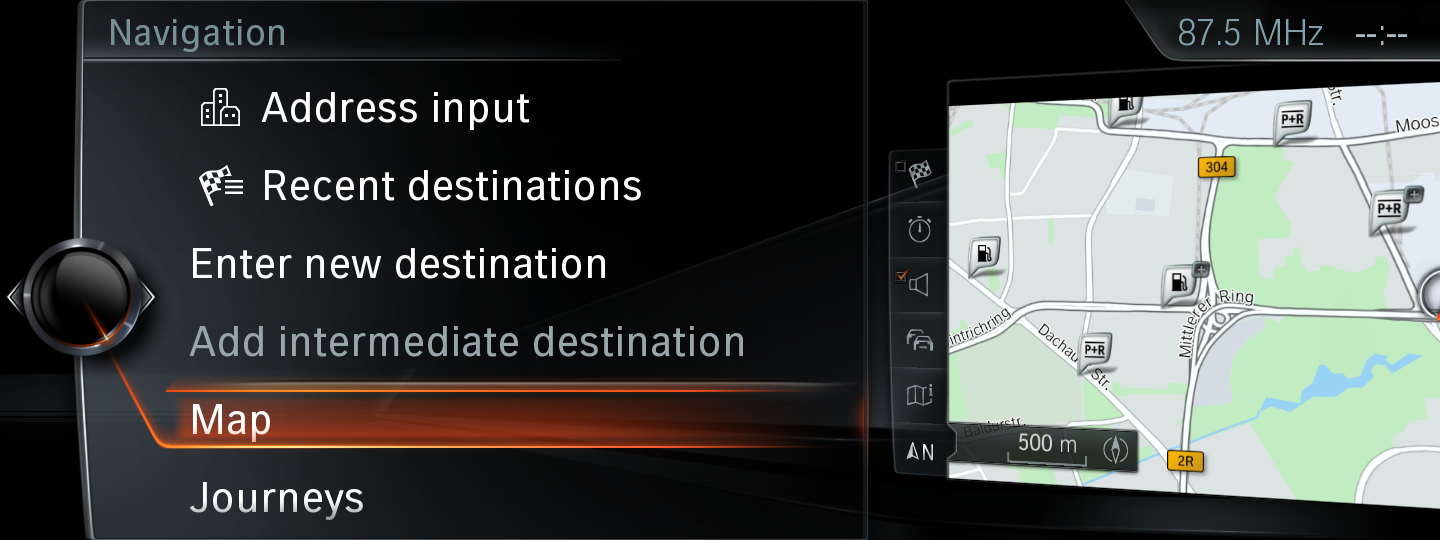

['screenshot_20000101-005432_HU1.png']

In [3]:
%gautoy_screenshot

This magic returns a list of taken screenshots names. You can suppress screenshots insertion and manipulate screenshots names like this:

In [4]:
screenshots = %gautoy_screenshot -ne
print('Received screenshots: %s' % ','.join(screenshots))

Received screenshots: screenshot_20000101-005452_HU1.png


## Remote run of scripts on target via `telnet` connect with magic `%%bash_target`

This magic allows to run *non-interactive scripts* on targest. It establishes `Telnet` connect and runs `ksh/bash` codes from cell on it.

#### Basic use

Here is a basic cell where we try to find lines with text `rse-` in `/opt/nav/path/to/navigation.ini`.

In [5]:
%%gautoy_bash

cat -n /opt/nav/path/to/navigation.ini | grep "rse-" 

#### Configuring and advanced `%%gautoy_bash` use


Default magic parameters are taken from `gAutoy` *configuration options*. E.g., the cell below sets `%%gautoy_bash` output style to `murphy`

In [6]:
gautoy.core.config.set_option('display.nb.code_highlight', 'murphy')

But you can specify them in the *magic's config line* as well. To get help on the magic config line parameters use option `-h`:

In [7]:
%%gautoy_bash -h
 

usage: __main__.py [-h] [-l LOGIN] [-p PASSWORD] [-w WAIT] [-i]
                   [--prompt PROMPT] [-s STYLE] [-n] [-v VERBOSE]
                   [host]

positional arguments:
  host

optional arguments:
  -h, --help            show this help message and exit
  -l LOGIN, --login LOGIN
                        Target login
  -p PASSWORD, --password PASSWORD
                        Target password
  -w WAIT, --wait WAIT  Time to wait [in sec] before closing connection
  -i, --no-exit         Skip auto-exit (caution: exit must be done explicitely
                        in last cell's line)
  --prompt PROMPT       Regex for target shell prompts [use for correct syntax
                        highlight]
  -s STYLE, --style STYLE
                        Output style schema
  -n, --lineno          Display line number
  -v VERBOSE, --verbose VERBOSE
                        Verbose level [0 - no output; 1 - `sh` output]


E.g., if you with you can deepen the output level with option `-v 2` and change output style with `-s native`.

In [8]:
%%gautoy_bash -s native -v 2

cat -n /opt/nav/path/to/navigation.ini | grep "rse-" 

The following cell resets target with ip `196.1.1.1`. In this case we are forced to use option `-i` to avoid auto-exit and have to wait a second before closing `Telnet` connection (`-w 1`). We suppress output (which is irrelevant in this case) with `-v 0`.

In [9]:
%%gautoy_bash 196.1.1.1 -i -w 1 -v 0

SomeNavigationServiceOnOffCmd appreset

You can make tabular output with specifying output line numbers with option `-n`.

In [ ]:
%%gautoy_bash -n

ls -l /opt/nav/some/path/to/bin | sort -nk5 | tail -n4

## Examples

For more examples see [cells collection](cells/gAutoy-cells-magics.ipynb).